## Importações

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.stats import entropy

import warnings
warnings.filterwarnings('ignore')

## Criando os dados

In [15]:
data = [('f',np.random.randint(18,65)) for _ in range(49)] + [('m',np.random.randint(10,35)) for _ in range(50)]
df = pd.DataFrame(data,columns=['sexo','idade'])

In [16]:
df.sexo

0     f
1     f
2     f
3     f
4     f
     ..
94    m
95    m
96    m
97    m
98    m
Name: sexo, Length: 99, dtype: object

## Análise dos dados

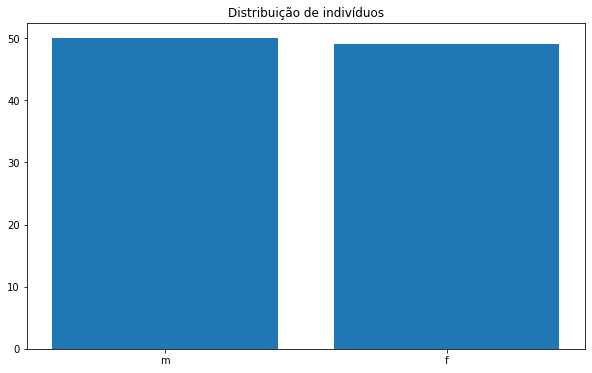

In [17]:
f, ax = plt.subplots(figsize=(10,6))

ax.bar(['m','f'],df.sexo.value_counts().values)
ax.set_title('Distribuição de indivíduos')

plt.show()

<b>Dadas as 99 pessoas acima qual a probabilidade da próxima pessoa ser do sexo M? E do sexo F?</b>

In [18]:
df.sexo.value_counts(normalize=True)

m    0.505051
f    0.494949
Name: sexo, dtype: float64

<b>O conjunto de pessoas acima entrega informações suficientes para que sua incerteza seja menor?</b>

O conjunto acima não entrega informações o suficiente para redução da incerteza, nossas chances de acerto estariam próximas de 50% que é a mesma porcentagem de cada um dos eventos acontecerem.

<b>Adicione no gráfico abaixo uma linha que represente a entropia total do conjunto acima.</b>

In [19]:
ent = entropy([0.50,0.49],base=2)

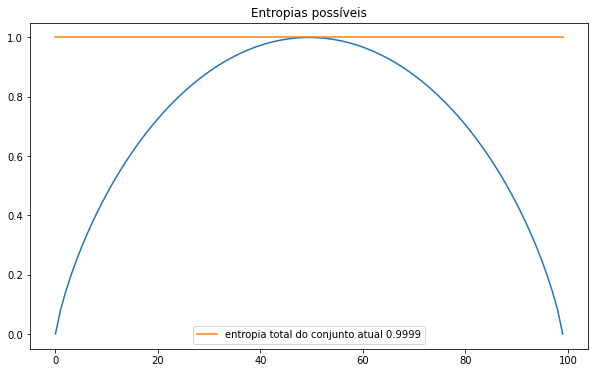

In [20]:
f, ax = plt.subplots(figsize=(10,6))

ax.plot([entropy([x,1-x],base=2) for x in np.linspace(0,1,100)])

## escreva seu código aqui

ax.plot(list(range(0,100)),[ent]*100,color='tab:orange',label=f'entropia total do conjunto atual {round(ent,4)}')

## escreva seu código aqu

ax.set_title('Entropias possíveis')
plt.legend()
plt.show()

## Mais separação... mais informação

Existe alguma informação que podemos utilizar para separar melhor os grupos reduzindo, assim, a incerteza e aumentando nossa chance de acertar?

In [21]:
df.head()

,sexo,idade
0,f,36
1,f,60
2,f,40
3,f,43
4,f,26


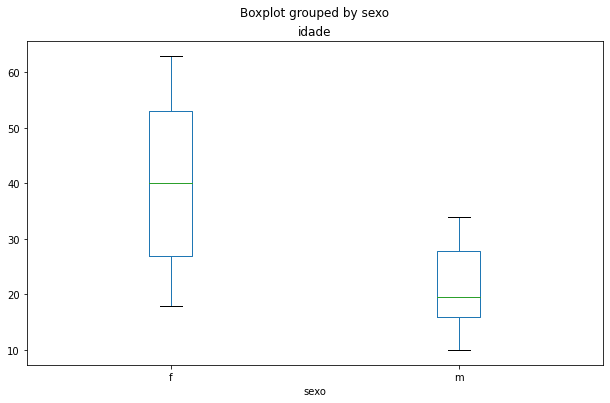

In [22]:
f, ax = plt.subplots(figsize=(10,6))

df.boxplot('idade','sexo',ax=ax,grid=False)

plt.show()

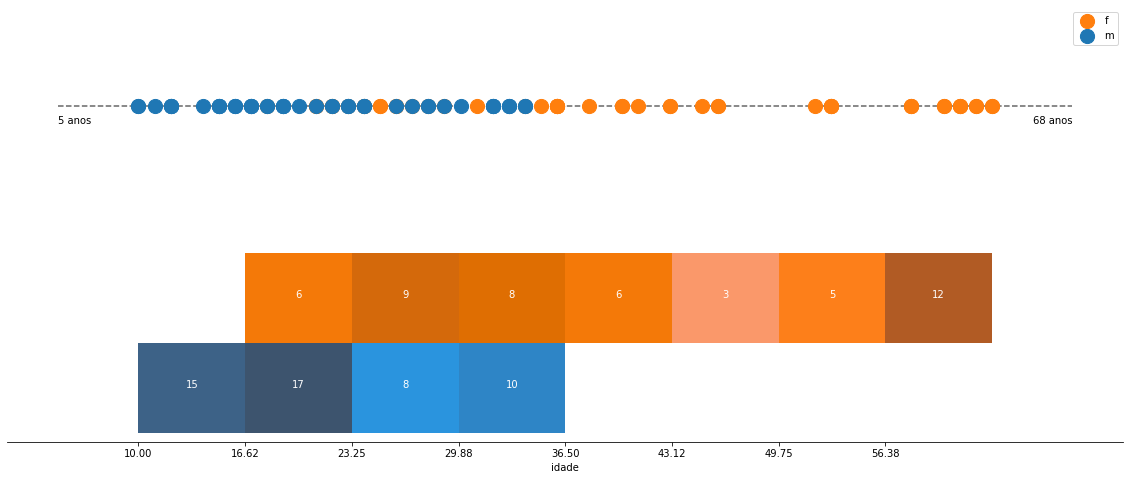

In [23]:
f, ax = plt.subplots(2,1,figsize=(20,8),sharex=True)

fem = df.query("sexo == 'f'").idade
m = df.query("sexo == 'm'").idade

ax[0].axis('off')
ax[0].plot(
    np.linspace(df.idade.min()-5,df.idade.max()+5,num=df.shape[0]),
    [0]*df.shape[0],
    '--',
    color='black',
    alpha=0.6)

ax[0].text(df.idade.min()-5,-0.01,s=f'{df.idade.min()-5} anos',ha='left')
ax[0].text(df.idade.max()+5,-0.01,s=f'{df.idade.max()+5} anos',ha='right')

ax[0].scatter(x=fem,y=[0]*len(fem),s=200,color='tab:orange',label='f',zorder=10)
ax[0].scatter(x=m,y=[0]*len(m),s=200,color='tab:blue',label='m',zorder=10)

ax[0].legend()


a = sns.histplot(df,x='idade',y='sexo',hue='sexo',hue_order=['m','f'],ax=ax[1],legend=False)
bins_ch = a.get_children()[0].get_coordinates()[0][:,0]
num_m = [x for x in a.get_children()[0].get_array().data][len(bins_ch)-1:]
num_fem = [x for x in a.get_children()[1].get_array().data][:len(bins_ch)+1]

coords = list(zip(bins_ch,num_m,num_fem))

for c in coords:
    ax[1].text(x=c[0]+(bins_ch[1]-bins_ch[0])/2,
            y=1,
            s=int(c[1]),
            color='white',
            zorder=100,
            ha='center')
    
    ax[1].text(x=c[0]+(bins_ch[1]-bins_ch[0])/2,
        y=0,
        s=int(c[2]),
        color='white',
        zorder=100,
        ha='center')


ax[1].set_xticks(np.array(coords)[:,0])
ax[1].spines['right'].set_visible(False)
ax[1].spines['top'].set_visible(False)
ax[1].spines['left'].set_visible(False)
ax[1].yaxis.set_visible(False)

plt.show()

<b>Qual valor de idade devemos escolher para reduzir ao máximo a entropia dos subconjutos resultantes?</b><br>
<b>Para isso vamos aprender o conceito de Information Gain</b>